In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Flatten,MaxPool2D,Conv2D,BatchNormalization,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category = FutureWarning)
%matplotlib inline


In [2]:
os.chdir('data')
if os.path.isdir("train/dog") is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test/dog')

os.chdir('../../')

In [3]:
os.listdir()


['.android',
 '.AndroidStudio3.6',
 '.atom',
 '.bash_history',
 '.conda',
 '.condarc',
 '.config',
 '.docker',
 '.eclipse',
 '.emulator_console_auth_token',
 '.ganttproject',
 '.git-for-windows-updater',
 '.gitconfig',
 '.gradle',
 '.h2.server.properties',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.m2',
 '.matplotlib',
 '.nbi',
 '.p2',
 '.pencil',
 '.ssh',
 '.sts4',
 '.tooling',
 '.viminfo',
 '.x2go',
 '3D Objects',
 'anaconda3',
 'AndroidStudioProjects',
 'AppData',
 'Application Data',
 'BrawlhallaReplays',
 'C++',
 'CNN',
 'CO2103.mysql.properties',
 'Contacts',
 'Cookies',
 'daocument.png',
 'DataStructures',
 'Desktop',
 'document.png',
 'Documents',
 'Downloads',
 'eclipse',
 'eclipse-workspace',
 'eclipse-workspace1',
 'eclipse-workspace3',
 'Favorites',
 'ganttproject.log',
 'ganttproject.log.lck',
 'gcc.exe',
 'gs-consuming-rest',
 'IntelGraphicsProfiles',
 'java0.log',
 'java0.log.lck',
 'Links',
 'Local Settings',
 'MicrosoftEdgeBackups',
 'Music',
 'My D

In [4]:
train_path ='CNN/data/train'
valid_path ='CNN/data/valid'
test_path ='CNN/data/test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [6]:
imgs,labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

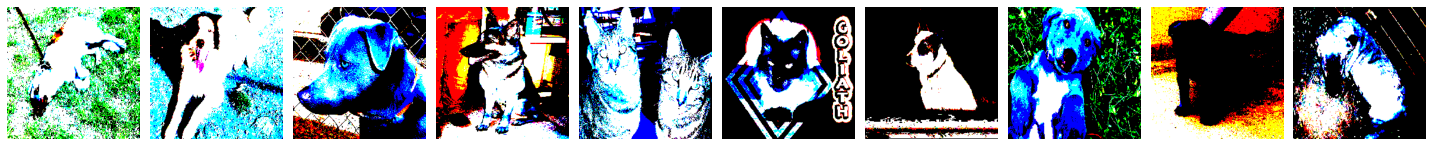

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [7]:
plotImages(imgs)
print(labels)

In [8]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu",padding ='same', input_shape =(224,224,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64, kernel_size=(3, 3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(units=2,activation='softmax')
])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
model.fit(x=train_batches,
    steps_per_epoch=100,
    validation_data=valid_batches,
    validation_steps=100,
    epochs=10,
    verbose=2
)

Epoch 1/10
100/100 - 117s - loss: 0.1113 - accuracy: 0.9670 - val_loss: 1.8238 - val_accuracy: 0.6300
Epoch 2/10
100/100 - 115s - loss: 0.0156 - accuracy: 0.9960 - val_loss: 2.0391 - val_accuracy: 0.6100
Epoch 3/10
100/100 - 141s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.1836 - val_accuracy: 0.6100
Epoch 4/10
100/100 - 188s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.9711 - val_accuracy: 0.5800
Epoch 5/10
100/100 - 95s - loss: 8.9472e-04 - accuracy: 1.0000 - val_loss: 2.5438 - val_accuracy: 0.5800
Epoch 6/10
100/100 - 95s - loss: 7.5076e-04 - accuracy: 1.0000 - val_loss: 2.5318 - val_accuracy: 0.6000
Epoch 7/10
100/100 - 93s - loss: 6.5431e-04 - accuracy: 1.0000 - val_loss: 2.7182 - val_accuracy: 0.5300
Epoch 8/10
100/100 - 96s - loss: 5.7753e-04 - accuracy: 1.0000 - val_loss: 2.1874 - val_accuracy: 0.5700
Epoch 9/10
100/100 - 122s - loss: 5.1279e-04 - accuracy: 1.0000 - val_loss: 2.2056 - val_accuracy: 0.5400
Epoch 10/10
100/100 - 114s - loss: 4.6246e-04 - accuracy: 1.0000 -

In [12]:
test_imgs, test_labels =next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

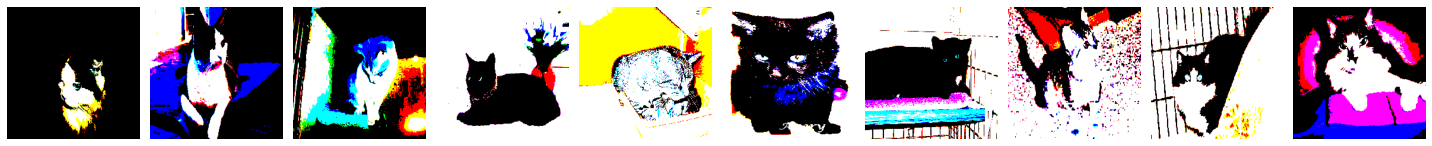

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [13]:
plotImages(test_imgs)
print(test_labels)

In [14]:
predictions = model.predict(test_batches,steps=len(test_batches),verbose=0)

In [15]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [16]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[30 20]
 [39 11]]


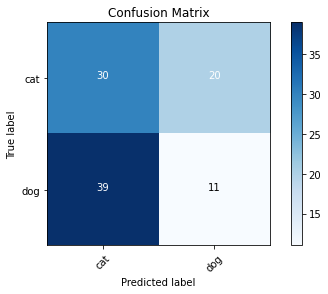

In [19]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [11]:
%tensorboard --logdir logs/fit


UsageError: Line magic function `%tensorboard` not found.


In [28]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [31]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [32]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [34]:
for layer in model.layers:
    layer.trainable = False
    

In [35]:
model.add(Dense(units=2, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [37]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
100/100 - 1188s - loss: 0.2756 - accuracy: 0.8840 - val_loss: 0.1591 - val_accuracy: 0.9300
Epoch 2/5
100/100 - 1036s - loss: 0.0784 - accuracy: 0.9660 - val_loss: 0.1316 - val_accuracy: 0.9500
Epoch 3/5
100/100 - 984s - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.1067 - val_accuracy: 0.9500
Epoch 4/5
100/100 - 1075s - loss: 0.0321 - accuracy: 0.9940 - val_loss: 0.0994 - val_accuracy: 0.9500
Epoch 5/5
100/100 - 1194s - loss: 0.0249 - accuracy: 0.9940 - val_loss: 0.0935 - val_accuracy: 0.9500


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

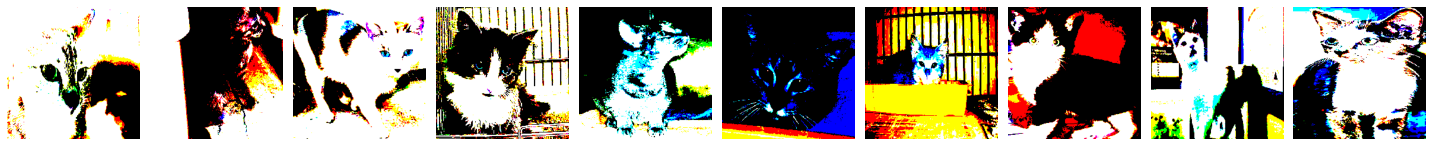

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [39]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [40]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

Confusion matrix, without normalization
[[49  1]
 [ 3 47]]


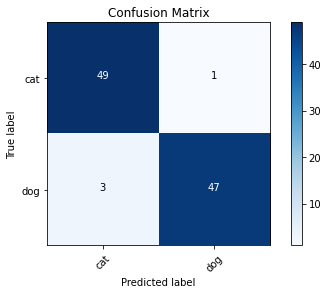

In [41]:
cm = confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))
cm_plot_labels =['cat','dog']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title ="Confusion Matrix")

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

mobile = tf.keras.applications.mobilenet.MobileNet()

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [49]:
x = mobile.layers[-6].output

In [50]:
output = Dense(units=2, activation='softmax')(x)

In [51]:
model = Model(inputs=mobile.input, outputs=output)

In [52]:
for layer in model.layers[:-5]:
    layer.trainable = False

In [53]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)


Epoch 1/10
100/100 - 76s - loss: 0.1899 - accuracy: 0.9160 - val_loss: 0.1876 - val_accuracy: 0.9050
Epoch 2/10
100/100 - 71s - loss: 0.0641 - accuracy: 0.9760 - val_loss: 0.1442 - val_accuracy: 0.9350
Epoch 3/10
100/100 - 73s - loss: 0.0464 - accuracy: 0.9850 - val_loss: 0.0948 - val_accuracy: 0.9700
Epoch 4/10
100/100 - 80s - loss: 0.0330 - accuracy: 0.9910 - val_loss: 0.0900 - val_accuracy: 0.9750
Epoch 5/10
100/100 - 63s - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0883 - val_accuracy: 0.9750
Epoch 6/10
100/100 - 62s - loss: 0.0175 - accuracy: 0.9940 - val_loss: 0.0713 - val_accuracy: 0.9750
Epoch 7/10
100/100 - 62s - loss: 0.0328 - accuracy: 0.9870 - val_loss: 0.0938 - val_accuracy: 0.9600
Epoch 8/10
100/100 - 62s - loss: 0.0154 - accuracy: 0.9940 - val_loss: 0.0645 - val_accuracy: 0.9750
Epoch 9/10
100/100 - 62s - loss: 0.0173 - accuracy: 0.9950 - val_loss: 0.0630 - val_accuracy: 0.9750
Epoch 10/10
100/100 - 65s - loss: 0.0090 - accuracy: 0.9980 - val_loss: 0.0603 - val_accura

In [55]:
test_labels = test_batches.classes

In [56]:
{'cat': 0, 'dog': 1}

{'cat': 0, 'dog': 1}

In [57]:
predictions = model.predict(x=test_batches, verbose=0)

In [58]:
def plot_confusion_matrix(cm, classes,
        normalize=False,
        title='Confusion matrix',
        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [59]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [60]:
cm_plot_labels = ['cat','dog']

Confusion matrix, without normalization
[[50  0]
 [ 1 49]]


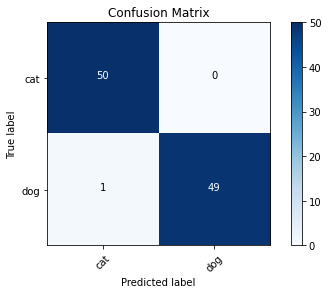

In [61]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [62]:
import cv2

In [64]:
print(cv2.__version__)

4.4.0
